<a href="https://colab.research.google.com/github/roshank1605A04/Coursera-Reviews-Analysis/blob/master/Coursera_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data

reviewbycourse = pd.read_csv('drive/My Drive/Projects/Coursera Reviews/reviews_by_course.csv')
review = pd.read_csv('drive/My Drive/Projects/Coursera Reviews/reviews.csv')
survey = pd.read_csv('drive/My Drive/Projects/Coursera Reviews/SurveySchema.csv')
response = pd.read_csv('drive/My Drive/Projects/Coursera Reviews/freeFormResponses.csv')
mcresponse = pd.read_csv('drive/My Drive/Projects/Coursera Reviews/multipleChoiceResponses.csv')

# getting the shape
print("Shape of reviews", reviewbycourse.shape)
print("Shape of reviews", review.shape)
print("Shape of reviews", survey.shape)
print("Shape of response", response.shape)
print("Shape of multiple choice respnse", mcresponse.shape)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of reviews (140320, 3)
Shape of reviews (107018, 3)
Shape of reviews (12, 52)
Shape of response (23860, 35)
Shape of multiple choice respnse (23860, 395)


In [4]:
reviewbycourse.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


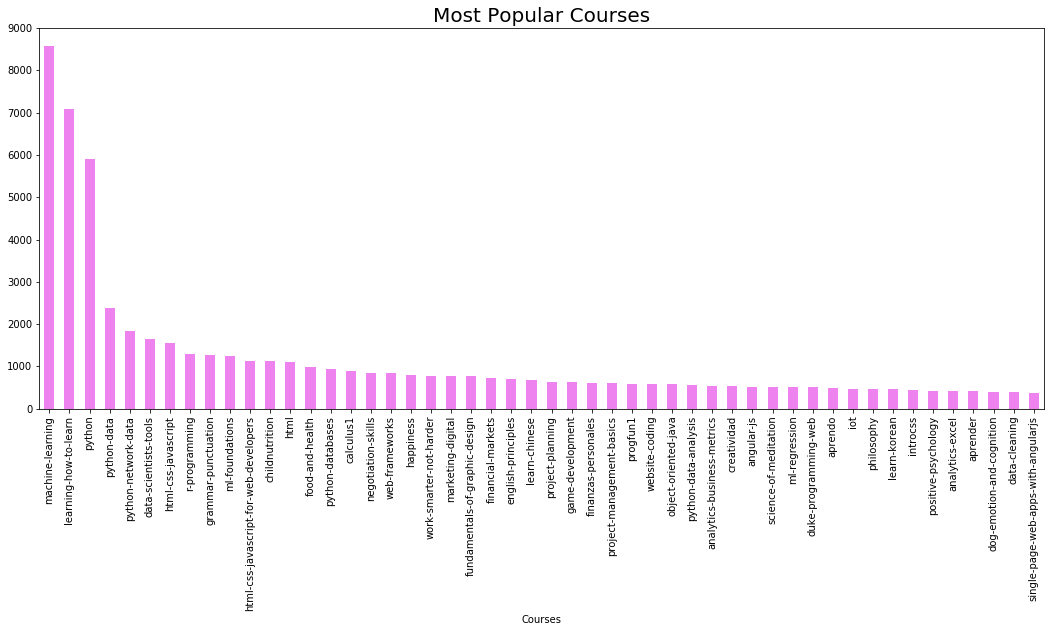

In [50]:
# looking at the most popularcourses

plt.rcParams['figure.figsize'] = (18, 7)
reviewbycourse['CourseId'].value_counts().head(50).plot.bar(color = 'violet')
plt.title('Most Popular Courses', fontsize = 20)
plt.xlabel('Courses')
plt.show()

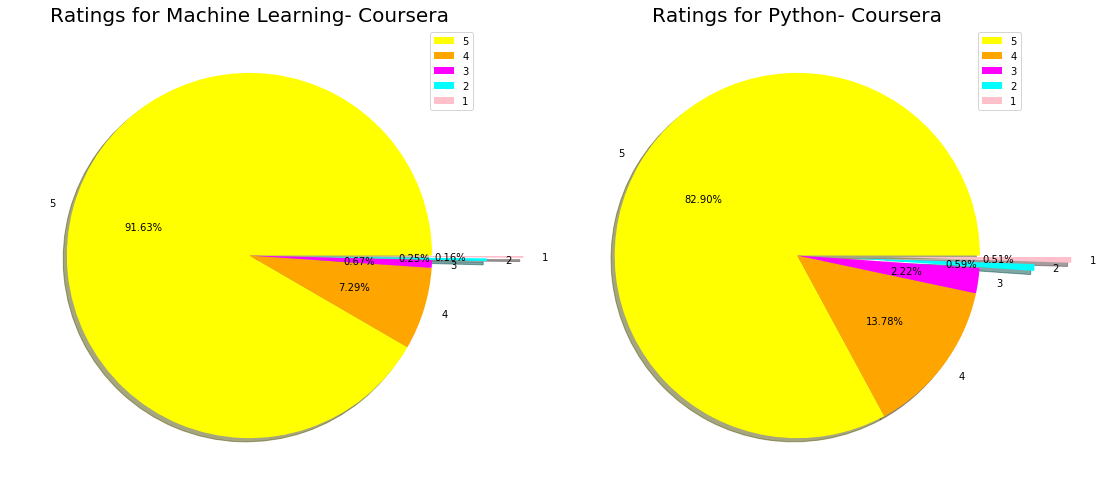

In [71]:
# plotting ratings of machine learning and python

#plt.rcParams['figure.figsize'] = (18, 10)

rating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'machine-learning']
plt.subplot(1, 2, 1)
rating.value_counts().plot.pie(colors = ['yellow', 'orange', 'magenta', 'cyan', 'pink'],
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Machine Learning- Coursera', fontsize = 20)
plt.legend()

pyrating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'python']

plt.subplot(1, 2, 2)
pyrating.value_counts().plot.pie(colors = ['yellow', 'orange', 'magenta', 'cyan', 'pink'],
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Python- Coursera', fontsize = 20)
plt.legend()
plt.show()

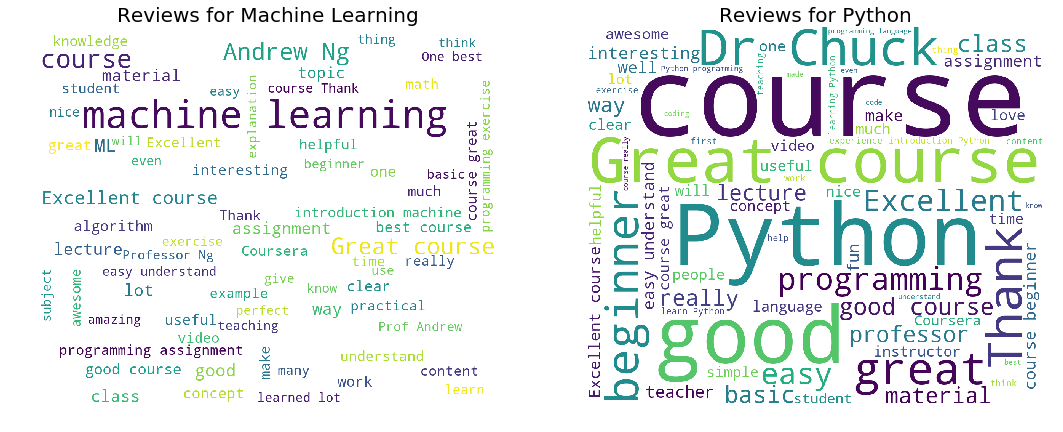

In [65]:
# let's check review for machine learning

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

mlreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'machine-learning']])

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 1200, height = 1000, max_words = 70).generate(mlreview)
plt.rcParams['figure.figsize'] = (18, 7)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Machine Learning', fontsize = 20)

pyreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'python']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 1200, height = 1000, max_words = 70).generate(pyreview)
plt.rcParams['figure.figsize'] = (18, 7)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Python', fontsize = 20)

plt.show()

In [5]:
review.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [31]:
survey

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
6,Or How long have you been writing code to anal...,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
7,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
response.head()

,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,...,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
0,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,What metrics do you or your organization use t...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...
1,NaN,NaN,NaN,NaN,NaN,"Jupyter Notebooks, Pycharm, Intelijidea",NaN,NaN,NaN,NaN,...,0.0,NaN,mlcourse.ai,NaN,ods.ai,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,anaconda,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# data cleaning

response['Q15_OTHER_TEXT'].replace('DigitalOcean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('digital ocean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('digitalocean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('Digitalocean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('Digital ocean', 'Digital Ocean', inplace = True)

response['Q15_OTHER_TEXT'].replace('none', 'None', inplace = True)
response['Q15_OTHER_TEXT'].replace('DigitalOcean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('Oracle', 'Oracle Cloud', inplace = True)
response['Q15_OTHER_TEXT'].replace('oracle', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('DigitalOcean', 'Digital Ocean', inplace = True)
response['Q15_OTHER_TEXT'].replace('tencent cloud', 'Tencent Cloud', inplace = True)

Text(0.5, 1.0, 'Most Popular Cloud Service Providers')

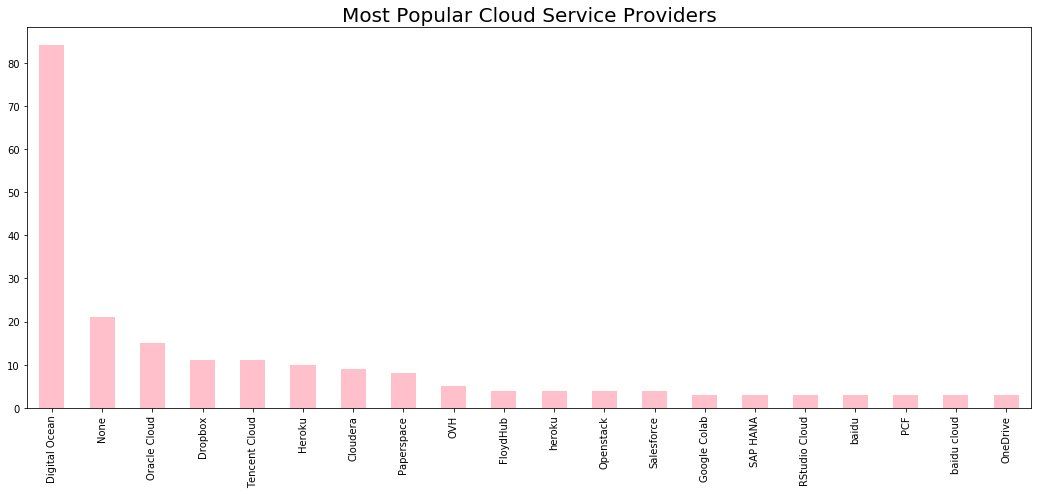

In [5]:
response['Q15_OTHER_TEXT'].value_counts().head(20).plot.bar(color = 'pink', figsize = (18, 7))
plt.title('Most Popular Cloud Service Providers', fontsize = 20)

In [43]:
response['Q11_OTHER_TEXT'].value_counts()

I am a student                                                                                                                                       49
Student                                                                                                                                              46
I'm a student                                                                                                                                        15
student                                                                                                                                              13
i am a student                                                                                                                                        5
Student                                                                                                                                               4
Study                                                                                   

In [0]:
# cleaning the q12 text
# use of primary tool

response['Q12_Part_4_TEXT'].replace('JupyterLab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyterlab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyterlab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter notebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterNotebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Lab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('local Jupyter / Python scripts', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter noebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, Anaconda, Keras, XGBoost, SHAP', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterNoteBook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter notebooks', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupiter', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyterLab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, vscode', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter* ,RStudio, custom tools', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, Sublime Text', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupyter googlecolab', 'Jupyter', inplace = True)

response['Q12_Part_4_TEXT'].replace('Jupyter lab', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('jupiter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter* , RStudio, custom tools', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Local Jupyter', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, Zeppelin', 'Jupyter', inplace = True)

response['Q12_Part_4_TEXT'].replace('RStudio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R, Python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Jupyter', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, JupyterLab', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('rstudio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Jupyter Notebook', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R and Python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('r', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R, python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R AND STATA', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio on laptop servers and cloud ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio & JupyterLab', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Anaconda, ClearVu', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio (primary) and SAS (secondary)', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio and python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R, Matlab, Python', 'R', inplace = True)


response['Q12_Part_4_TEXT'].replace('Jupiter notebook', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('JupyterLab, RStudio', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('python', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, JupterLab', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, R', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, Jupyter Notebook',  'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Rstudio on laptop servers and cloud', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio and JupyterLab ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Spyder', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R Studio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio ', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('R studio', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('RStudio, Python', 'R', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter notebook ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebook ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python and R', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python, Jupyter', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('PyCharm', 'Pycharm', inplace = True)
response['Q12_Part_4_TEXT'].replace('anaconda', 'Anaconda', inplace = True)
response['Q12_Part_4_TEXT'].replace('spyder', 'Spyder', inplace = True)
response['Q12_Part_4_TEXT'].replace('MATLAB', 'Matlab', inplace = True)
response['Q12_Part_4_TEXT'].replace('Jupyter Notebook ', 'Jupyter', inplace = True)
response['Q12_Part_4_TEXT'].replace('Python ', 'Python', inplace = True)
response['Q12_Part_4_TEXT'].replace('Pycharm ', 'Pycharm', inplace = True)


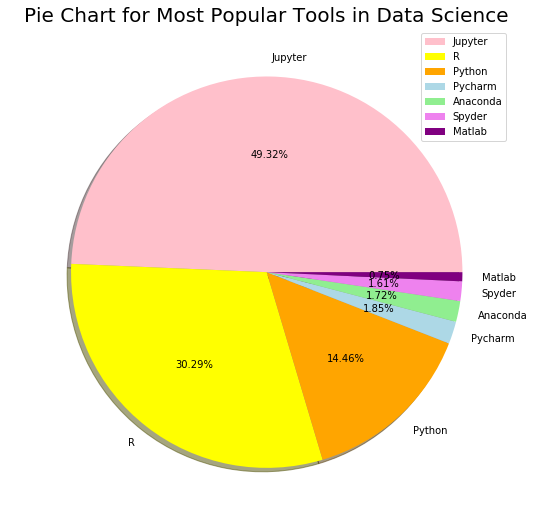

In [9]:
# Top 7 Platforms

response['Q12_Part_4_TEXT'].value_counts().head(7).plot.pie(colors = ['pink', 'yellow', 'orange','lightblue', 'lightgreen',
                                                                     'violet', 'purple'],
                                                            labels = ['Jupyter', 'R', 'Python', 'Pycharm', 'Anaconda', 'Spyder', 'Matlab'],
                                                           autopct = '%.2f%%', shadow = True)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Pie Chart for Most Popular Tools in Data Science', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [8]:
mcresponse.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [32]:
# checking the values inside question 7

mcresponse['Q7'].value_counts()

Computers/Technology                                                                                               5584
I am a student                                                                                                     4658
Academics/Education                                                                                                2749
Accounting/Finance                                                                                                 1433
Other                                                                                                               940
Online Service/Internet-based Services                                                                              871
Medical/Pharmaceutical                                                                                              751
Government/Public Service                                                                                           636
Insurance/Risk Assessment               

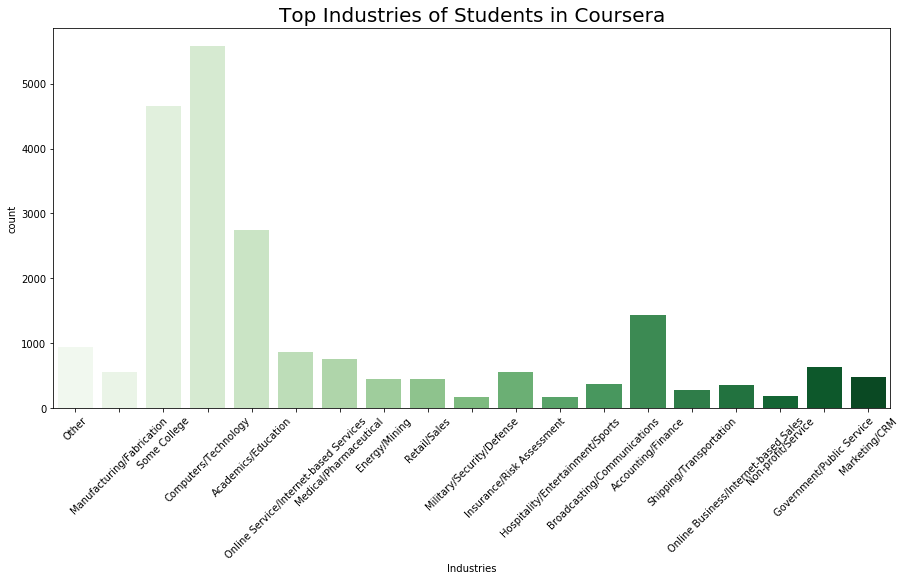

In [34]:
# data cleaning
mcresponse['Q7'].replace('In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice', 'Other', inplace = True)
mcresponse['Q7'].replace('I am a student', 'Some College', inplace = True)

# countplot

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q7'], palette = 'Greens')
plt.title('Top Industries of Students in Coursera', fontsize = 20)
plt.xlabel('Industries')
plt.xticks(rotation = 45)
plt.show()

In [26]:
mcresponse['Q5'].value_counts()

Computer science (software engineering, etc.)                       9430
Engineering (non-computer focused)                                  3705
Mathematics or statistics                                           2950
A business discipline (accounting, economics, finance, etc.)        1791
Physics or astronomy                                                1110
Information technology, networking, or system administration        1029
Medical or life sciences (biology, chemistry, medicine, etc.)        871
Other                                                                770
Social sciences (anthropology, psychology, sociology, etc.)          554
Humanities (history, literature, philosophy, etc.)                   269
Environmental science or geology                                     253
I never declared a major                                             128
Fine arts or performing arts                                          87
Which best describes your undergraduate major? - Se

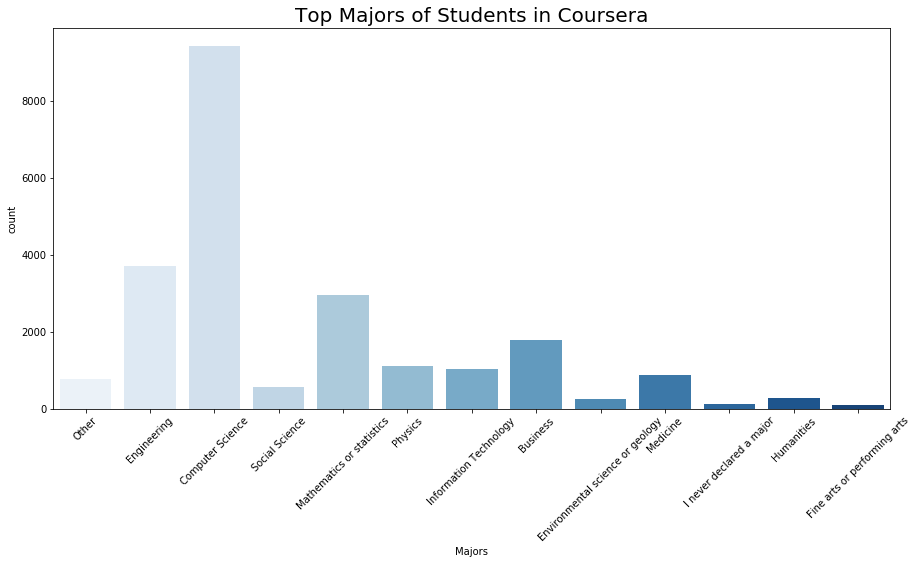

In [35]:
# data cleaning

mcresponse['Q5'].replace('Computer science (software engineering, etc.)', 'Computer Science', inplace = True)
mcresponse['Q5'].replace('Engineering (non-computer focused)', 'Engineering', inplace = True)
mcresponse['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business', inplace = True)
mcresponse['Q5'].replace('Physics or astronomy', 'Physics', inplace = True)
mcresponse['Q5'].replace('Information technology, networking, or system administration', 'Information Technology', inplace = True)
mcresponse['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medicine', inplace = True)
mcresponse['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science', inplace = True)
mcresponse['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q5'], palette = 'Blues')
plt.title('Top Majors of Students in Coursera', fontsize = 20)
plt.xlabel('Majors')
plt.xticks(rotation = 45)
plt.show()

In [24]:
# checking the values inside question 6

mcresponse['Q6'].value_counts()

Student                                                                                                    5253
Data Scientist                                                                                             4137
Software Engineer                                                                                          3130
Data Analyst                                                                                               1922
Other                                                                                                      1322
Research Scientist                                                                                         1189
Not employed                                                                                                842
Consultant                                                                                                  785
Business Analyst                                                                                        

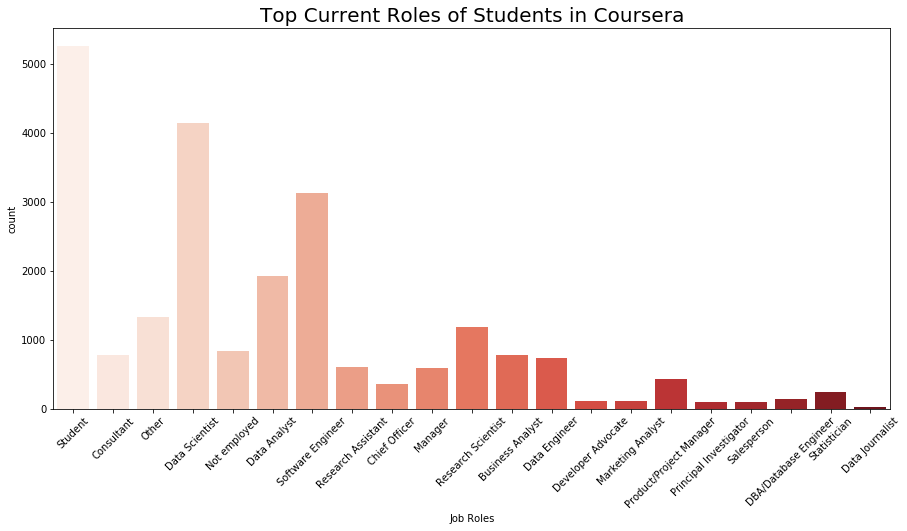

In [36]:
# data cleaning

mcresponse['Q6'].replace('Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'Student', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q6'], palette = 'Reds')
plt.title('Top Current Roles of Students in Coursera', fontsize = 20)
plt.xlabel('Job Roles')
plt.xticks(rotation = 45)
plt.show()

In [17]:
mcresponse['Q4'].value_counts()

Master’s degree                                                                                                    10855
Bachelor’s degree                                                                                                   7083
Doctoral degree                                                                                                     3357
Some college/university study without earning a bachelor’s degree                                                    967
Professional degree                                                                                                  599
I prefer not to answer                                                                                               345
No formal education past high school                                                                                 232
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?        1
Name: Q4, dtype: int64

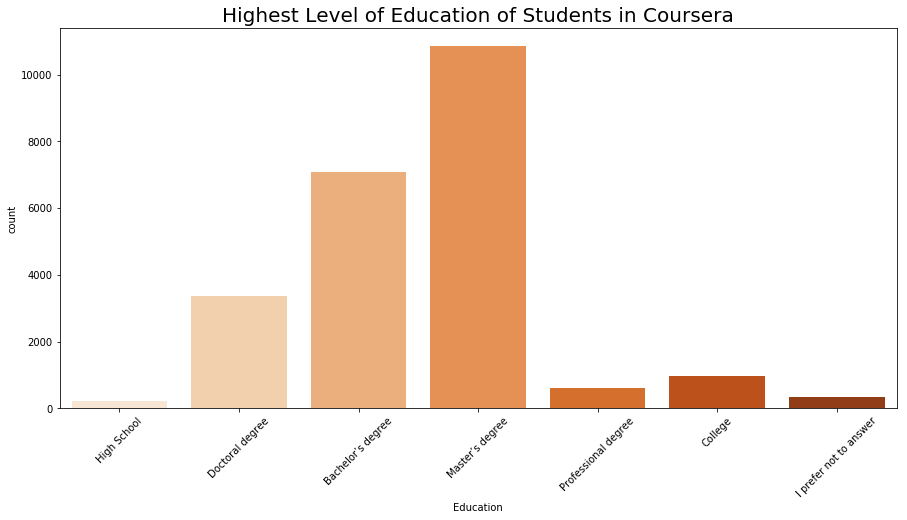

In [37]:
# data cleaning
mcresponse['Q4'].replace('No formal education past high school', 'High School', inplace = True)
mcresponse['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'College', inplace = True)
mcresponse['Q4'].replace('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'High School', inplace = True)     

# countplot
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q4'], palette = 'Oranges')
plt.title('Highest Level of Education of Students in Coursera', fontsize = 20)
plt.xlabel('Education')
plt.xticks(rotation = 45)
plt.show()

In [15]:
mcresponse['Q1'].value_counts()

Male                                      19430
Female                                     4010
Prefer not to say                           340
Prefer to self-describe                      79
What is your gender? - Selected Choice        1
Name: Q1, dtype: int64

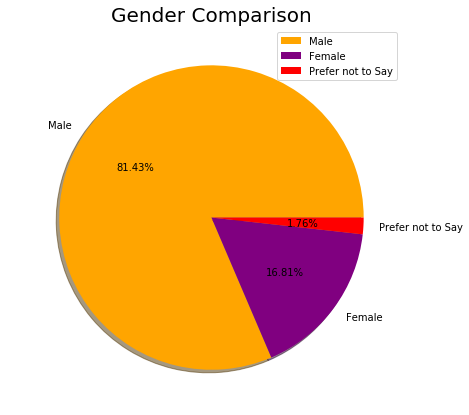

In [20]:
mcresponse['Q1'].replace('Prefer to self-describe', 'Prefer not to say', inplace = True)
mcresponse['Q1'].replace('What is your gender? - Selected Choice', 'Prefer not to say', inplace = True)

mcresponse['Q1'].value_counts().plot.pie(colors = ['orange', 'purple', 'red'],
                                        labels = ['Male', 'Female', 'Prefer not to Say'],
                                        autopct = '%.2f%%',
                                        shadow = True)
plt.rcParams['figure.figsize'] = (9, 9)
plt.legend()
plt.axis('off')
plt.title('Gender Comparison', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 50 Countries Where Coursera is Popular')

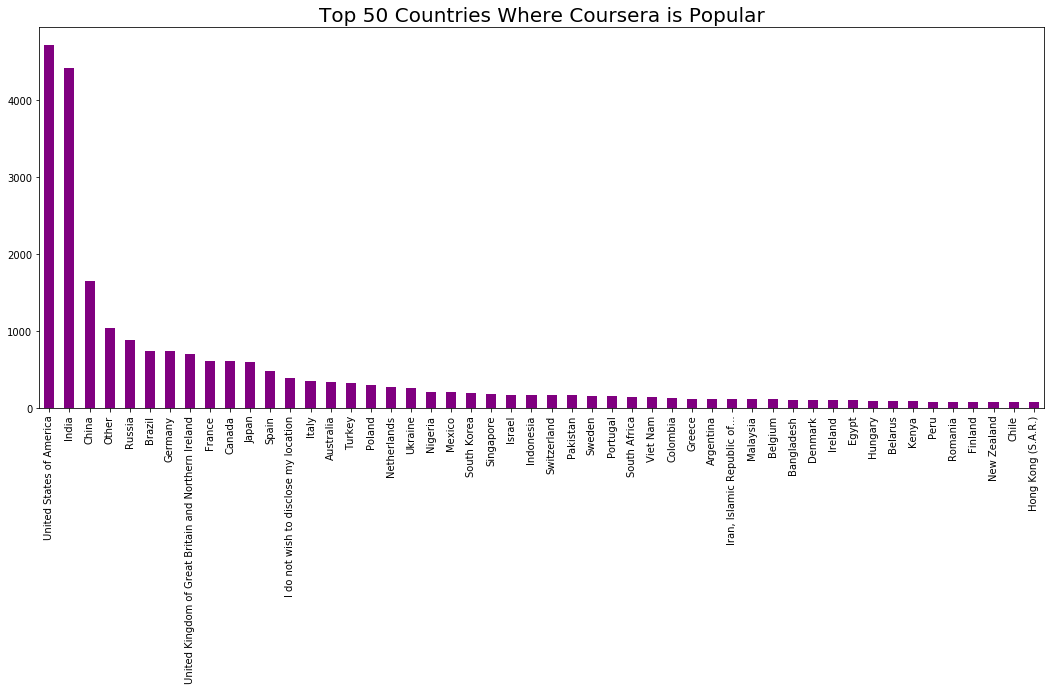

In [14]:
# top 50 countries where coursera is popular

mcresponse['Q3'].value_counts().head(50).plot.bar(figsize = (18, 7), color = 'purple')
plt.title('Top 50 Countries Where Coursera is Popular', fontsize = 20)

In [9]:
# describing the review by course

reviewbycourse.describe()

,Label
count,140320.000000
mean,4.619185
std,0.821347
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
review.describe()

,Id,Label
count,107018.000000,107018.000000
mean,53508.500000,4.581145
std,30893.579891,0.860956
min,0.000000,1.000000
25%,26754.250000,4.000000
50%,53508.500000,5.000000
75%,80262.750000,5.000000
max,107017.000000,5.000000


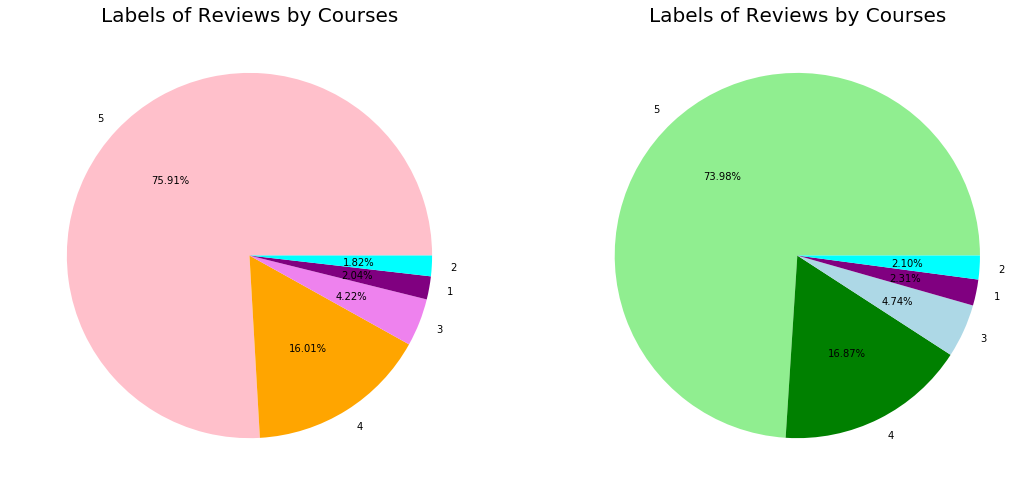

In [11]:
# checking different labels for reviews in reviews by courses

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
reviewbycourse['Label'].value_counts().plot.pie(colors = ['pink', 'orange', 'violet', 'purple', 'cyan'], labels = ["5", "4", "3", "1", "2"], autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)
review['Label'].value_counts().plot.pie(colors = ['lightgreen', 'green', 'lightblue', 'purple', 'cyan'], labels = ["5", "4", "3", "1", "2"], autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20)

plt.show()

**Word Cloud for Rating 2**

Text(0.5, 1.0, 'Most Frequent Words for Reviews')

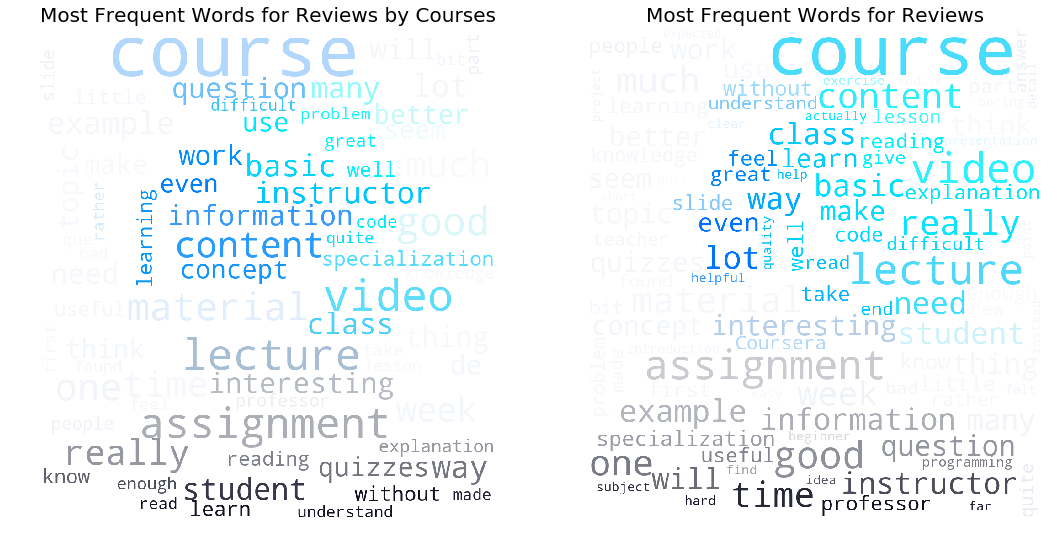

In [15]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 2]])

mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/courseraa.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 2]])
mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/courseraa.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 100, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20)


**Word Cloud for Rating 3**

Text(0.5, 1.0, 'Most Frequent Words for Reviews')

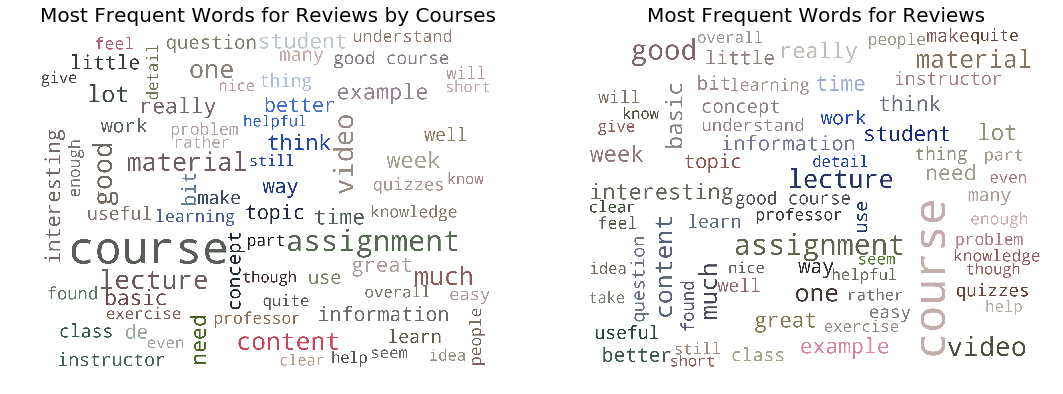

In [23]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 3]])

mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/bird.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 3]])
mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/bird.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20)


**Word Cloud for Rating 4**

Text(0.5, 1.0, 'Most Frequent Words for Reviews')

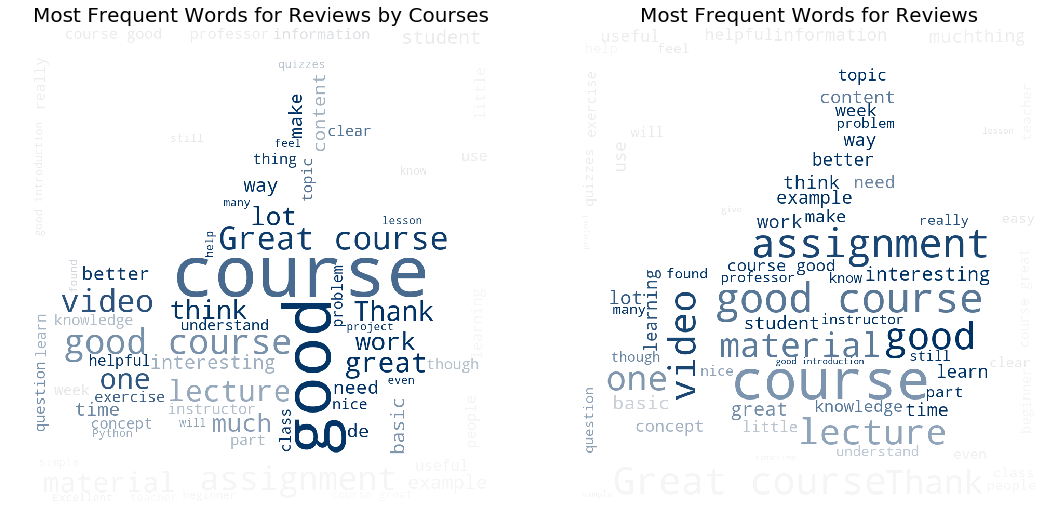

In [27]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 4]])

mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/thumsup.png'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 4]])
mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/thumsup.png'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20)


Text(0.5, 1.0, 'Most Frequent Words for Reviews')

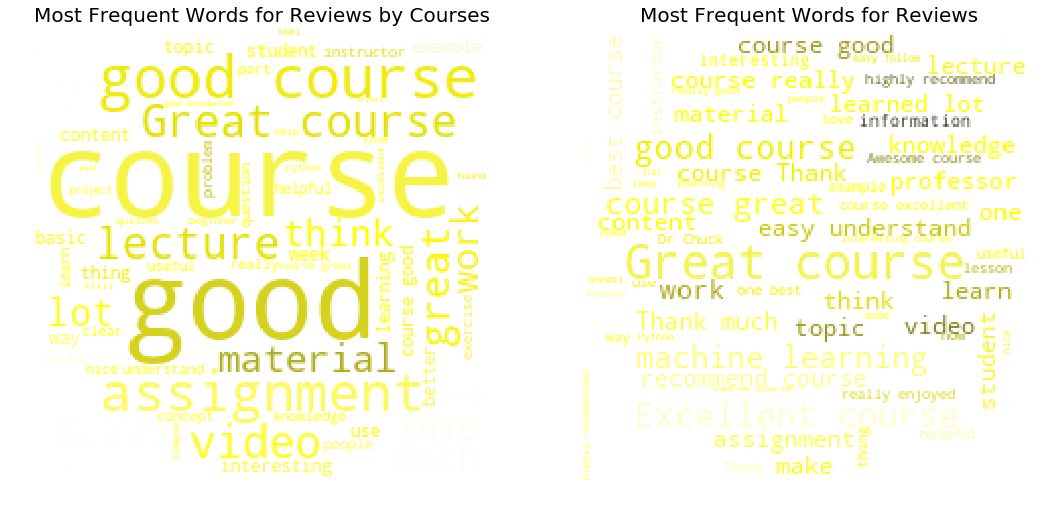

In [30]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 4]])

mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/smiley.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 5]])
mask = np.array(Image.open('drive/My Drive/Projects/Coursera Reviews/smiley.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20)
